---

# **Exploratory Data Analysis**

---

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import EDA

In [3]:
PATH = "data/training_set_VU_DM.csv"

---

### **1. Goal**

---

*To predict what hotel a user is most likely to book.*

---

### **2. Dataset description**

---

*Each entry (row) represents a search query by a user together with one resulting hotel.*

##### **Dependent variables (training dataset only!)**
1. `position` (Integer): 
      - Hotel position on Expedia's search results page. This is only provided for the training data, but not the test data.
2. `click_bool` (Boolean): 
      - 1 if the user clicked on the property, 0 if not.
3. `booking_bool` (Boolean): 
      - 1 if the user booked the property, 0 if not.
4. `gross_booking_usd` (Float): 
      - Total value of the transaction. This can differ from the price_usd due to taxes, fees, conventions on multiple day bookings and purchase of a room type other than the one shown in the search.

##### **Independent variables**

1. `srch_id` (Integer): 
      - ID of a single search query.
      - Note: Two entries with equal values belong to the same user & search query (this happens because multiple hotels are shown per search query).
2. `date_time` (Date/Time): 
      - Date and time of the search.
3. `site_id` (Integer): 
      - ID of the Expedia point of sale (i.e., Expedia.com, Expedia.co.uk, Expedia.co.jp).
4. `visitor_location_country_id` (Integer): 
      - The ID of the country the customer is located.
5. `visitor_hist_starrating` (Float): 
      - The mean star rating of hotels the customer has previously purchased; null signifies there is no purchase history.
6. `visitor_hist_adr_usd` (Float): 
      - The mean price per night (in US$) of the hotels the customer has previously purchased; null signifies there is no purchase history.
7. `prop_country_id` (Integer): 
      - The ID of the country the hotel is located in.
8. `prop_id` (Integer): 
      - The ID of the hotel.
9. `prop_starrating` (Integer): 
      - The star rating of the hotel, from 1 to 5, in increments of 1.

10. `prop_review_score` (Float): 
      - The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments.

11. `prop_brand_bool` (Integer): 
      - A 1 means the property is a known brand chain; 0 if it is an independent hotel.

12. `prop_location_score1` (Float): 
      - A (first) score outlining the desirability of a hotel’s location.

13. `prop_location_score2` (Float): 
      - A (second) score outlining the desirability of the hotel’s location.

14. `prop_log_historical_price` (Float):
      - The logarithm of the mean price of the hotel over the last trading period.

15. `price_usd` (Float):
      - Displayed price of the hotel for the given search. Note that different countries have different conventions regarding displaying taxes and fees and the value may be per night or for the whole stay.

16. `promotion_flag` (Integer):
      - +1 if the hotel had a sale price promotion specifically displayed.

17. `srch_destination_id` (Integer):
      - ID of the destination where the hotel search was performed.

18. `srch_length_of_stay` (Integer):
      - Number of nights stay that was searched.

19. `srch_booking_window` (Integer):
      - Number of days in the future the hotel stay started from the search date.

20. `srch_adults_count` (Integer):
      - Number of adults specified in the hotel room.

21. `srch_children_count` (Integer):
      - Number of (extra occupancy) children specified in the hotel room.

22. `srch_room_count` (Integer):
      - Number of hotel rooms specified in the search.

23. `srch_saturday_night_bool` (Boolean):
      - +1 if the stay includes a Saturday night, starts from Thursday with a length of stay less than or equal to 4 nights (i.e., weekend); otherwise 0.

24. `srch_query_affinity_score` (Float):
      - The log of the probabilities a hotel will be clicked on in Internet searches (when the values are negative). A null signifies there are no data (i.e., hotel did not register in any searches).

25. `orig_destination_distance` (Float):
      - Physical distance between the hotel and the customer at the time of search. A null means the distance could not be calculated.

26. `random_bool` (Boolean):
      - +1 when the displayed sort was random, 0 when the normal sort order was displayed.

27. `compX_rate` (Integer):
      - +1 if Expedia has a lower price than competitor X for the hotel; 0 if the same; -1 if Expedia’s price is higher than competitor X; null signifies there is no competitive data.
      - Note: X goes from 1 to 8 (same for variables below)

28. `compX_inv` (Integer):
      - +1 if competitor X does not have availability for the hotel; 0 if both Expedia and competitor X have availability; null signifies there is no competitive data.

29. `compX_rate_percent_diff` (Float):
      - The absolute percentage difference (if one exists) between Expedia and competitor X’s price (Expedia’s price the denominator); null signifies there is no competitive data.

---

### **3. Dataset summaries**

---

In [2]:
PATH = "data/training_set_VU_DM.csv"  # PATH TO ORIGINAL TRAINING DATA

In [3]:
EDA.get_head(PATH)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
lengths = EDA.apply_function_to_chunks(PATH, function=len)
print(f'Number of entries in training data: {sum(lengths)}')

Number of entries in training data: 4958347


In [5]:
missing_values = EDA.apply_function_to_chunks(PATH, function=EDA.count_missing_values_by_column)
missing_values = sum(missing_values)
print(f'Number of missing values in training data: {sum(missing_values)}')

Number of missing values in training data: 119733280


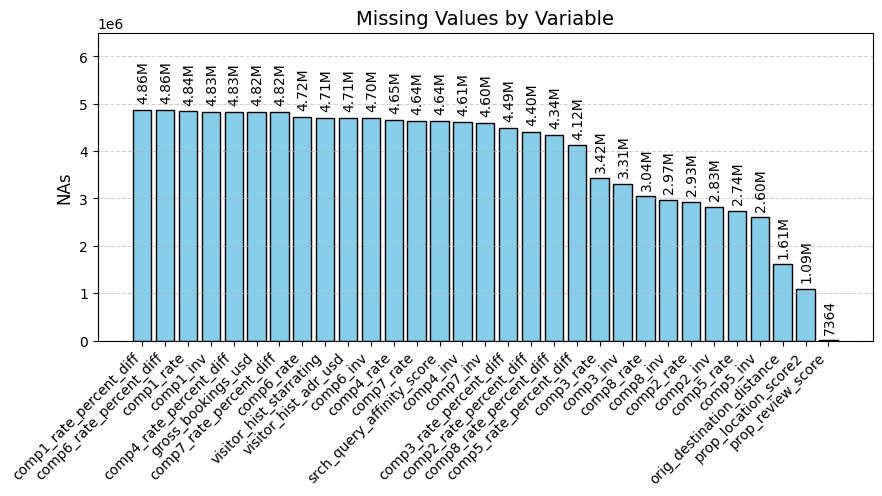

In [6]:
# NOTE: Only variables with missing values are included, otherwise too messy

non_zeros = missing_values[missing_values > 0]
non_zeros = non_zeros.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.title('Missing Values by Variable', fontsize=14)
plt.ylim(0, 6_500_000)

bars = plt.bar(non_zeros.index, non_zeros, color='skyblue', edgecolor='black') 
y_offset = 200_000
for bar, count in zip(bars, non_zeros.values):
    # if count > 1_000_000 then format as 1.00M
    if count > 1_000_000:
        count_tag = f'{count/1_000_000:.2f}M'
    else:
        count_tag = f'{count}'
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.05, count + y_offset, count_tag, rotation=90, ha='center', fontsize=10)

plt.ylabel('NAs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [7]:
# TODO (?): Add more summary statistic

---

### **4. Dependent variable exploration**

---

*Here we explore which variables are most related to the dependent variables*

In [8]:
integer_variables = [
    "srch_id", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", 
    "prop_starrating", "prop_brand_bool", "promotion_flag", "srch_destination_id", 
    "srch_length_of_stay", "srch_booking_window", "srch_adults_count", "srch_children_count", 
    "srch_room_count", "srch_saturday_night_bool", "random_bool", "comp1_rate", "comp1_inv", 
    "comp2_rate", "comp2_inv", "comp3_rate", "comp3_inv", "comp4_rate", "comp4_inv", 
    "comp5_rate", "comp5_inv", "comp6_rate", "comp6_inv", "comp7_rate", "comp7_inv", 
    "comp8_rate", "comp8_inv", "click_bool", "booking_bool"
]

float_variables = [
    "visitor_hist_starrating", "visitor_hist_adr_usd", "prop_review_score", 
    "prop_location_score1", "prop_location_score2", "prop_log_historical_price", 
    "price_usd", "srch_query_affinity_score", "orig_destination_distance", 
    "comp1_rate_percent_diff", "comp2_rate_percent_diff", "comp3_rate_percent_diff", 
    "comp4_rate_percent_diff", "comp5_rate_percent_diff", "comp6_rate_percent_diff", 
    "comp7_rate_percent_diff", "comp8_rate_percent_diff", "gross_booking_usd"
]

boolean_variables = [
    "prop_brand_bool", "srch_saturday_night_bool", "random_bool", "click_bool", "booking_bool"
]

##### **4.1** `booking_bool`

*Examine summary statistics of some variables, conditional on `booking_bool` being either `0` or `1`*

In [9]:
chunks = pd.read_csv(PATH, chunksize=10_000)

# initialize empty lists to store the averages
avgs_not_booked = []
avgs_booked = []

for chunk in chunks:

    chunk = chunk.drop(columns=['date_time', 'srch_id', 'gross_bookings_usd'])  # drops gross_bookings_usd (NAN results), date_time & srch_id  TODO: investigate the day for which, on average, the most bookings are made

    # standardize entries for all variables in chunk
    scaler = StandardScaler()
    chunk_scaled = scaler.fit_transform(chunk)
    chunk_scaled = pd.DataFrame(chunk_scaled, columns=chunk.columns)

    # condition on booking_bool, > 0 means booking, < 0 means no booking TODO: THIS NEEDS TO BE VERIFIED FOR ALL CHUNCKS (CURRENTLY ONLY FIRST CHUNK)
    not_booked = chunk_scaled[chunk_scaled['booking_bool'] < 0]
    booked = chunk_scaled[chunk_scaled['booking_bool'] > 0]

    # aggregate the averages of all other variables
    avg_not_booked = not_booked.mean()
    avg_booked = booked.mean()
    avgs_not_booked.append(avg_not_booked)
    avgs_booked.append(avg_booked)

# take the average of the aggregated averages
aggr_avgs_not_booked = pd.concat(avgs_not_booked).groupby(level=0).mean()
aggr_avgs_booked = pd.concat(avgs_booked).groupby(level=0).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


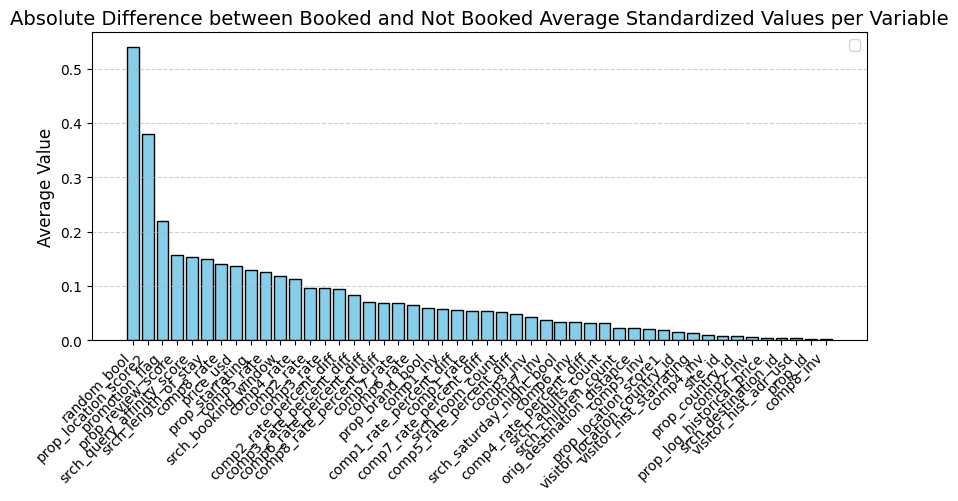

In [11]:
diff = abs(aggr_avgs_booked - aggr_avgs_not_booked)
diff = diff.sort_values(ascending=False)

# remove the 4 test variables (note: usd is already removed)
diff = diff.drop(['position', 'click_bool', 'booking_bool'])

# plot the differences
plt.figure(figsize=(10, 4))
plt.title('Absolute Difference between Booked and Not Booked Average Standardized Values per Variable', fontsize=14)

bars = plt.bar(diff.index, diff, color='skyblue', edgecolor='black')

plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

##### **4.2** `booking_click` **&** `click_bool` **conditioned on** `position`

In [4]:
# Get all unique positions in the dataset
unique_positions = EDA.get_unique_values(PATH, 'position')
print(f'Unique positions in the dataset: {unique_positions}')

Unique positions in the dataset: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


In [5]:
chunks = pd.read_csv(PATH, chunksize=100_000)

counts = []

for chunk in chunks:
    result = chunk.groupby('position')[['booking_bool', 'click_bool']].sum().reset_index()
    counts.append(result)

counts = pd.concat(counts).groupby('position').sum()

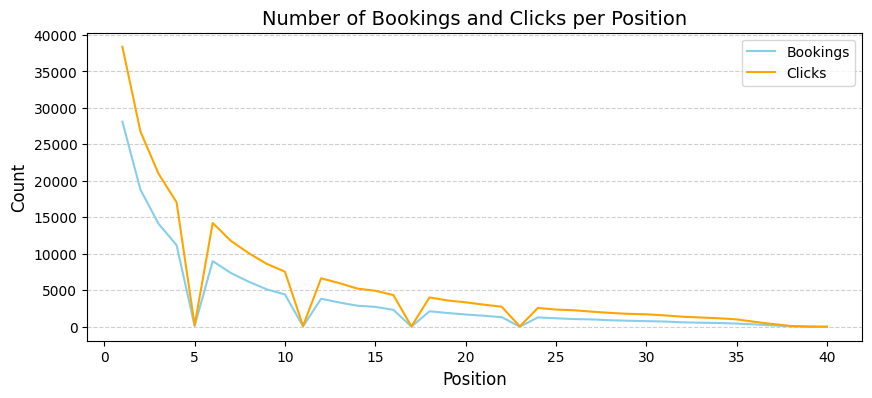

In [6]:
# plot the counts
plt.figure(figsize=(10, 4))
plt.title('Number of Bookings and Clicks per Position', fontsize=14)

plt.plot(counts.index, counts['booking_bool'], label='Bookings', color='skyblue')
plt.plot(counts.index, counts['click_bool'], label='Clicks', color='orange')

plt.ylabel('Count', fontsize=12)
plt.xlabel('Position', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()